In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

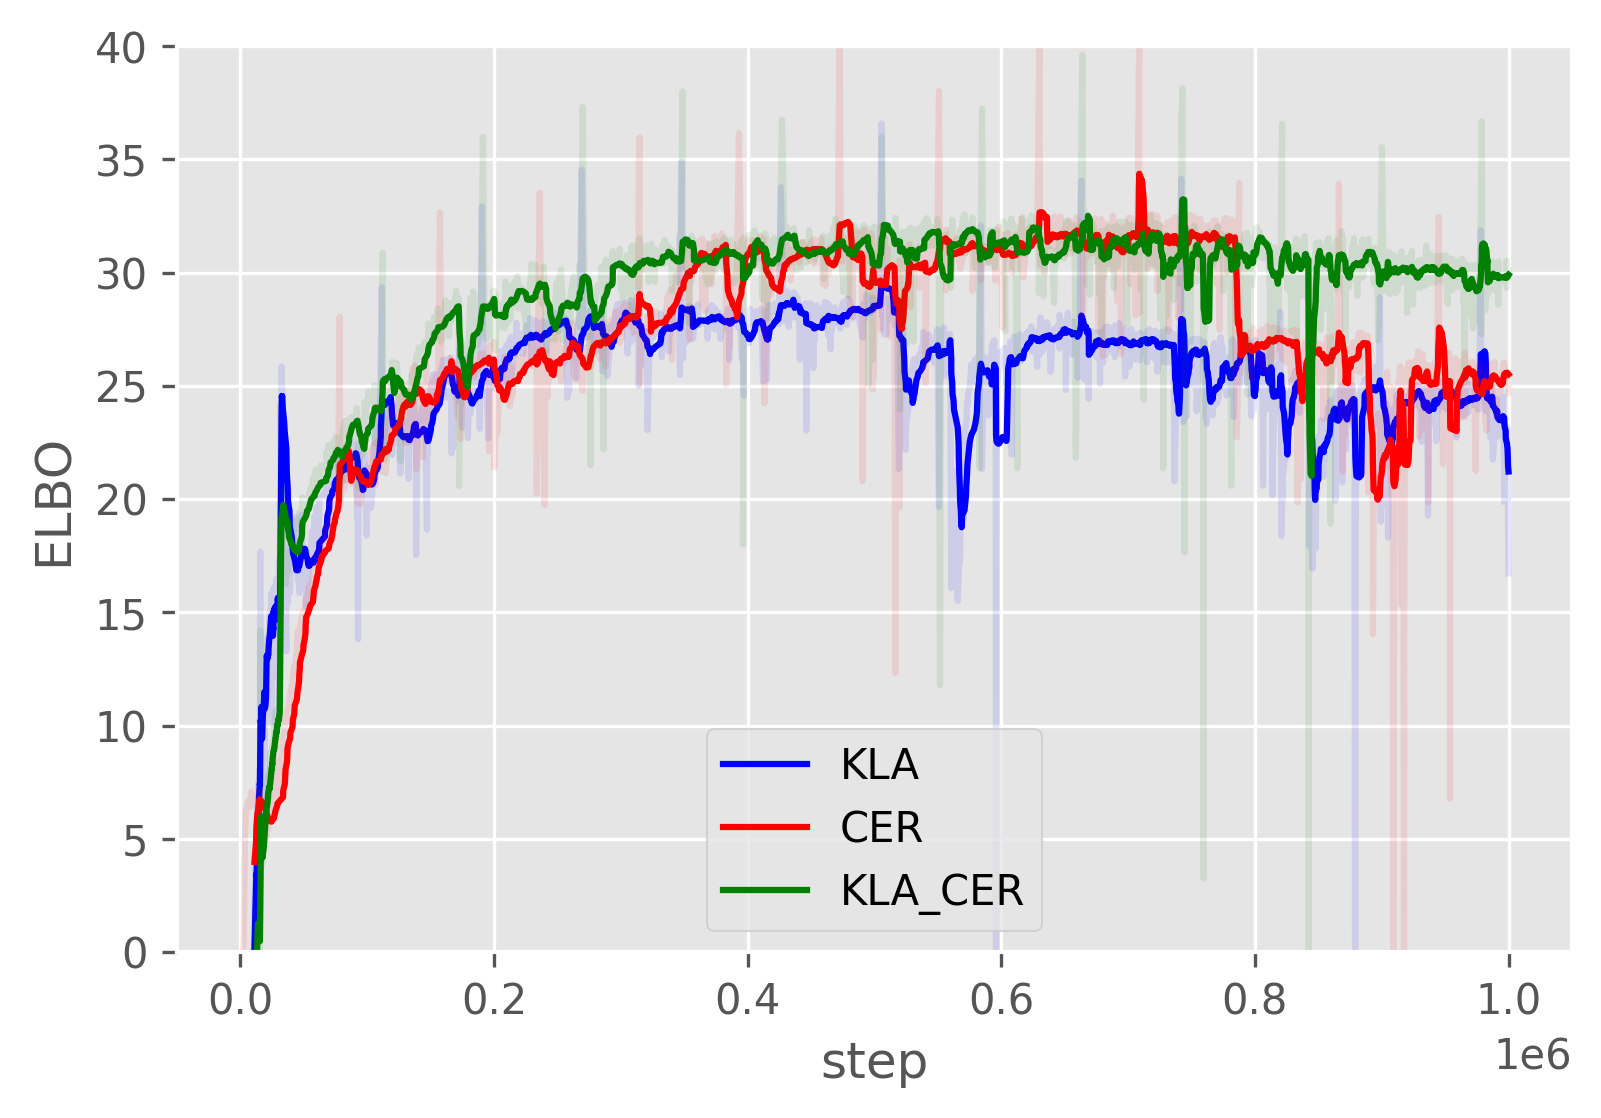

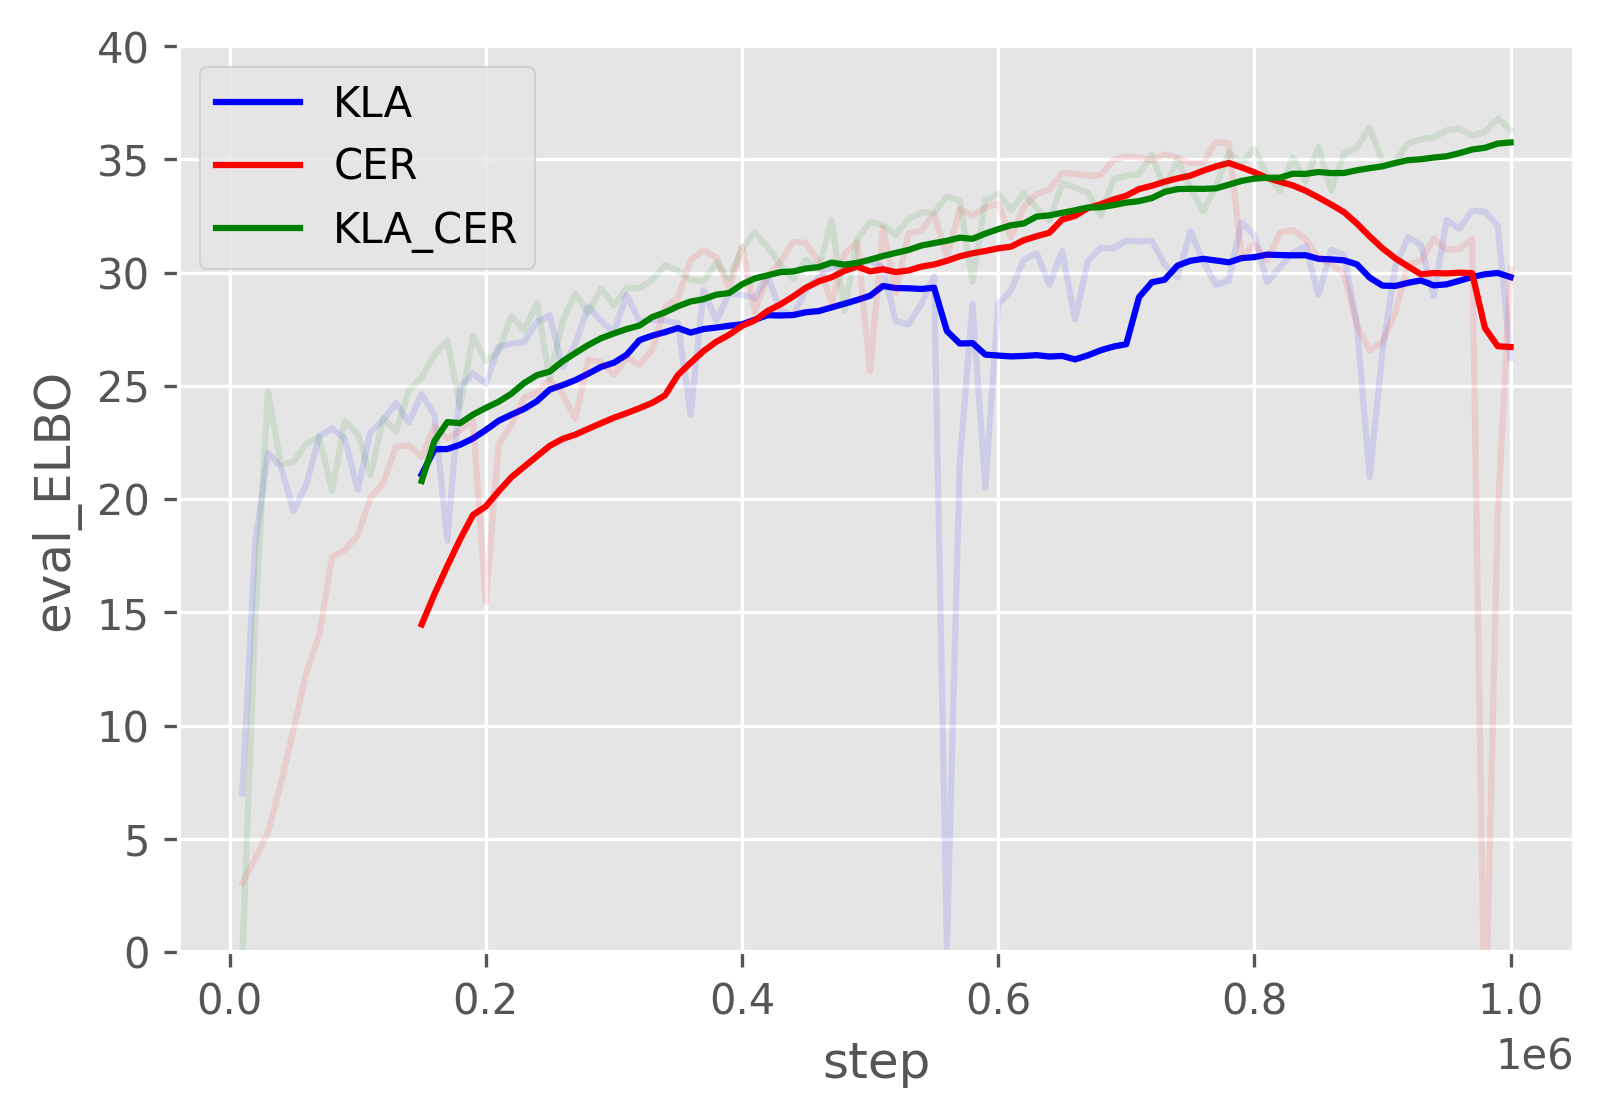

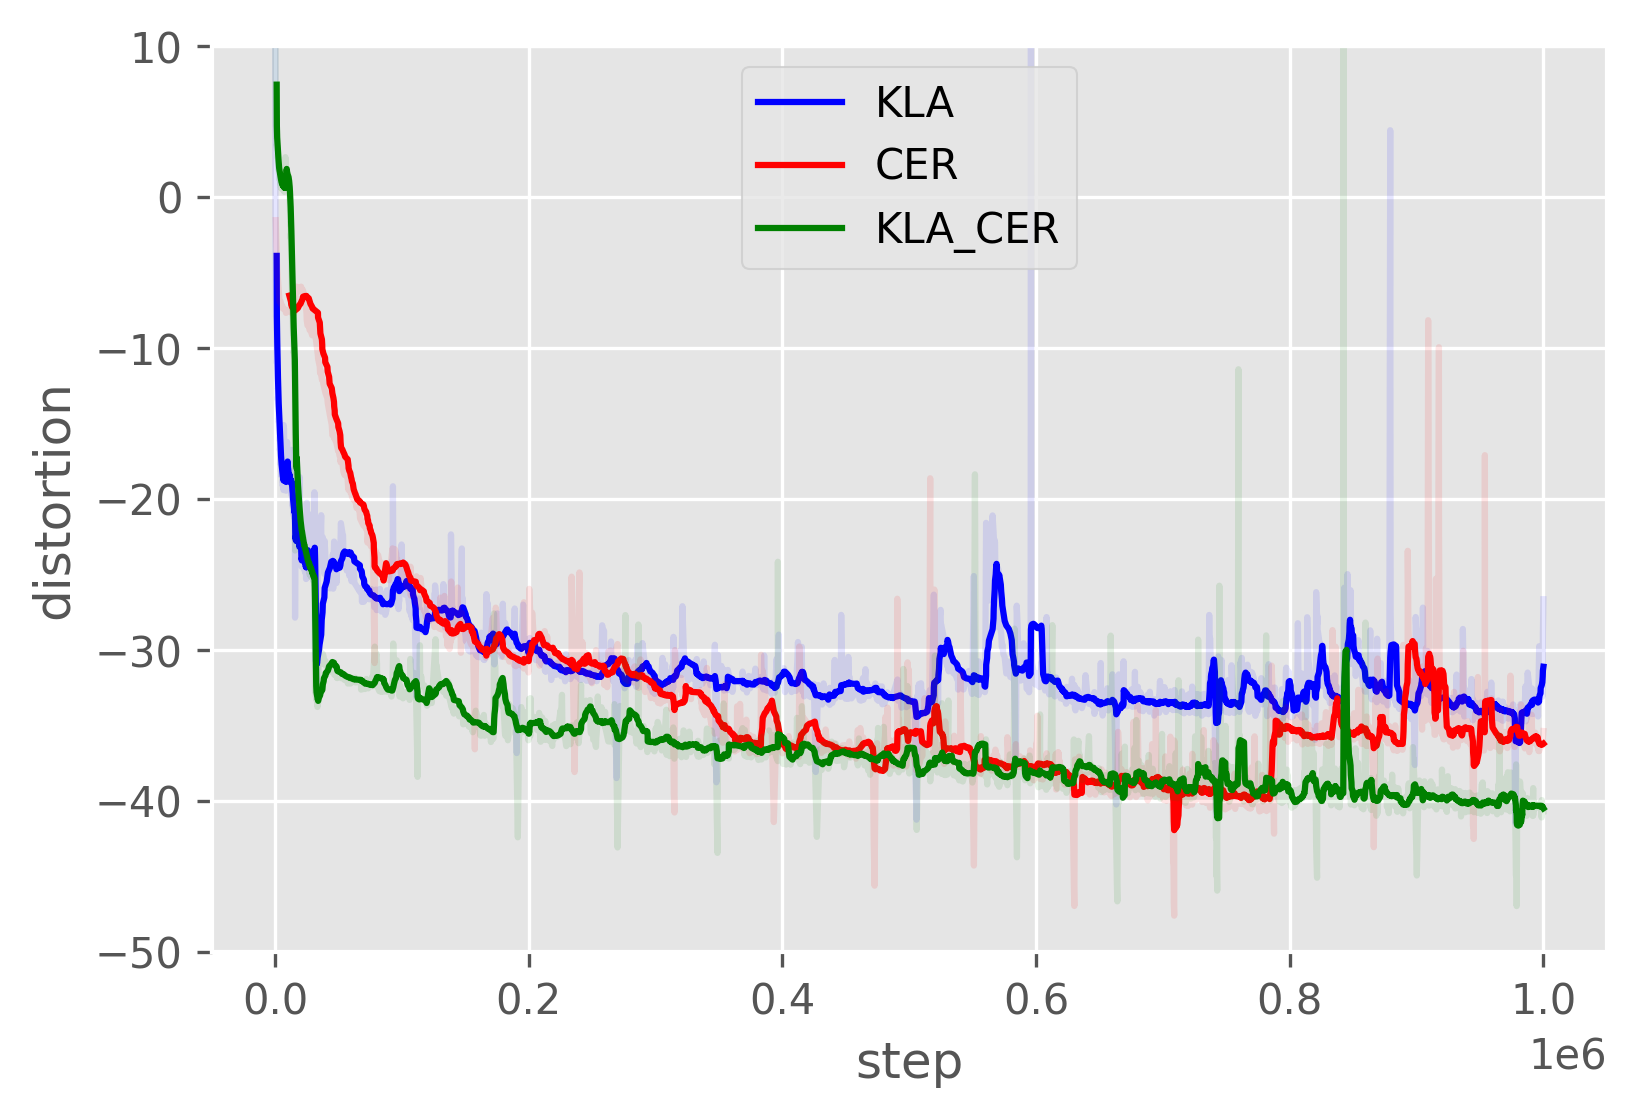

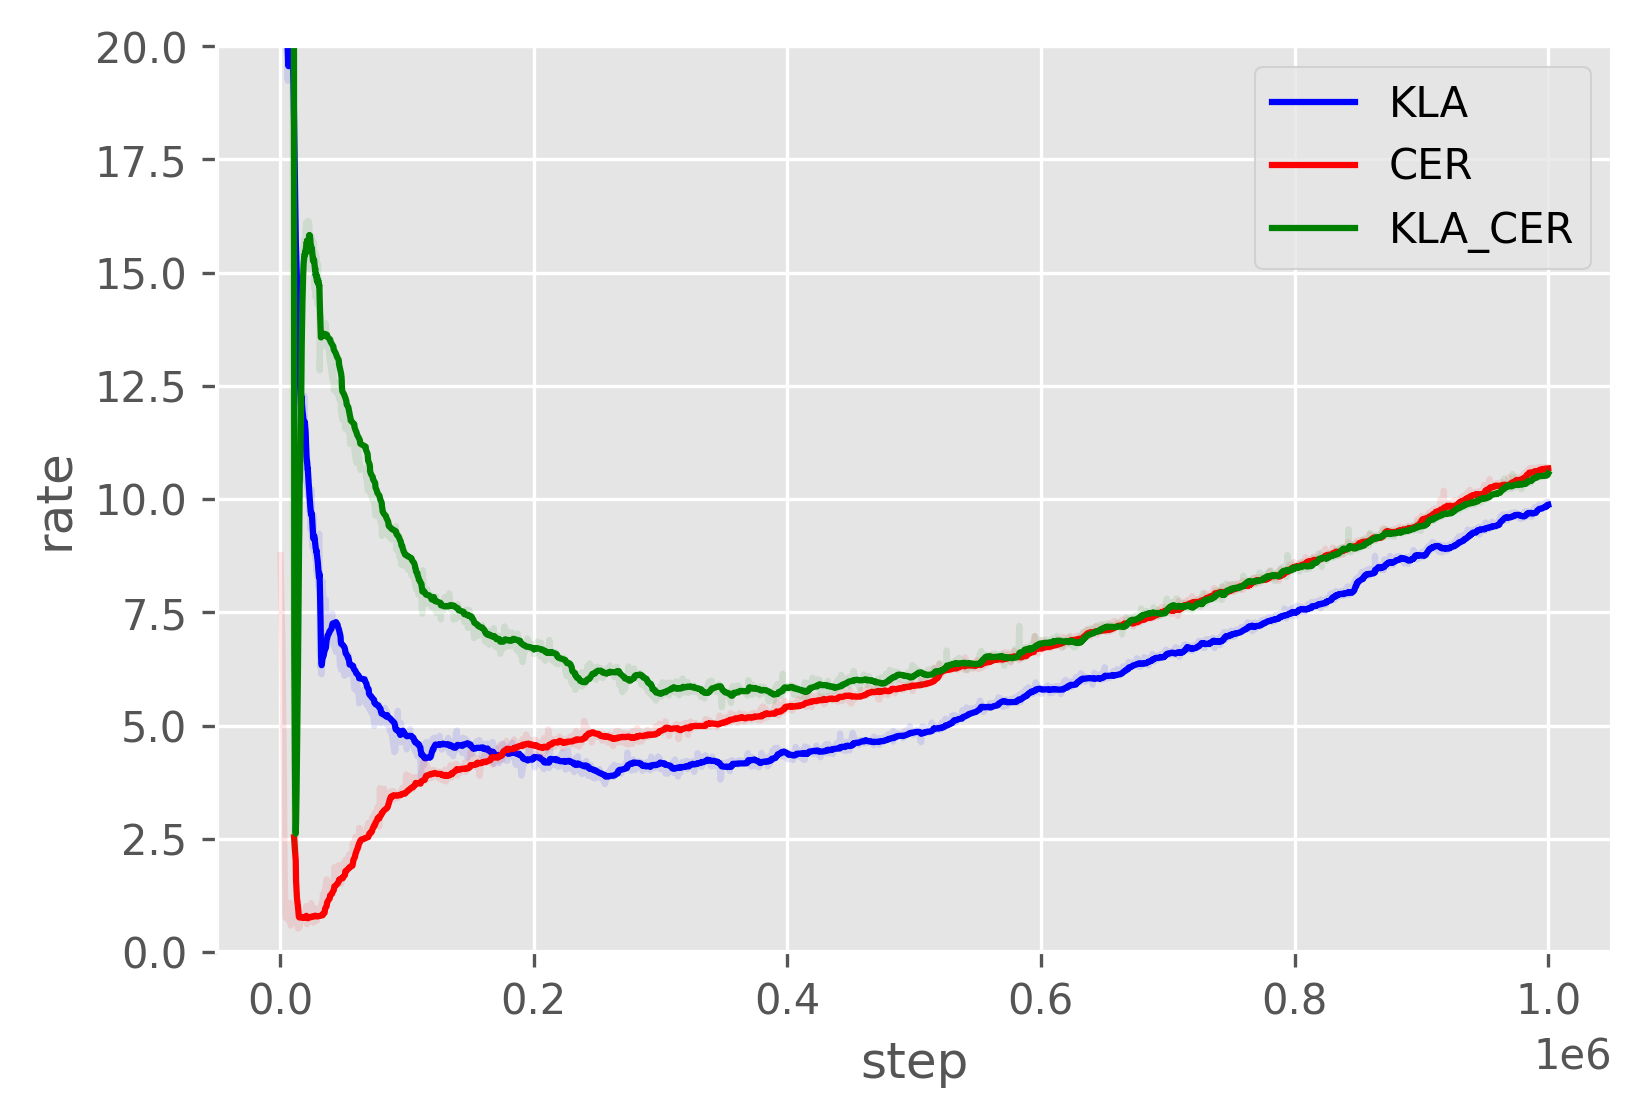

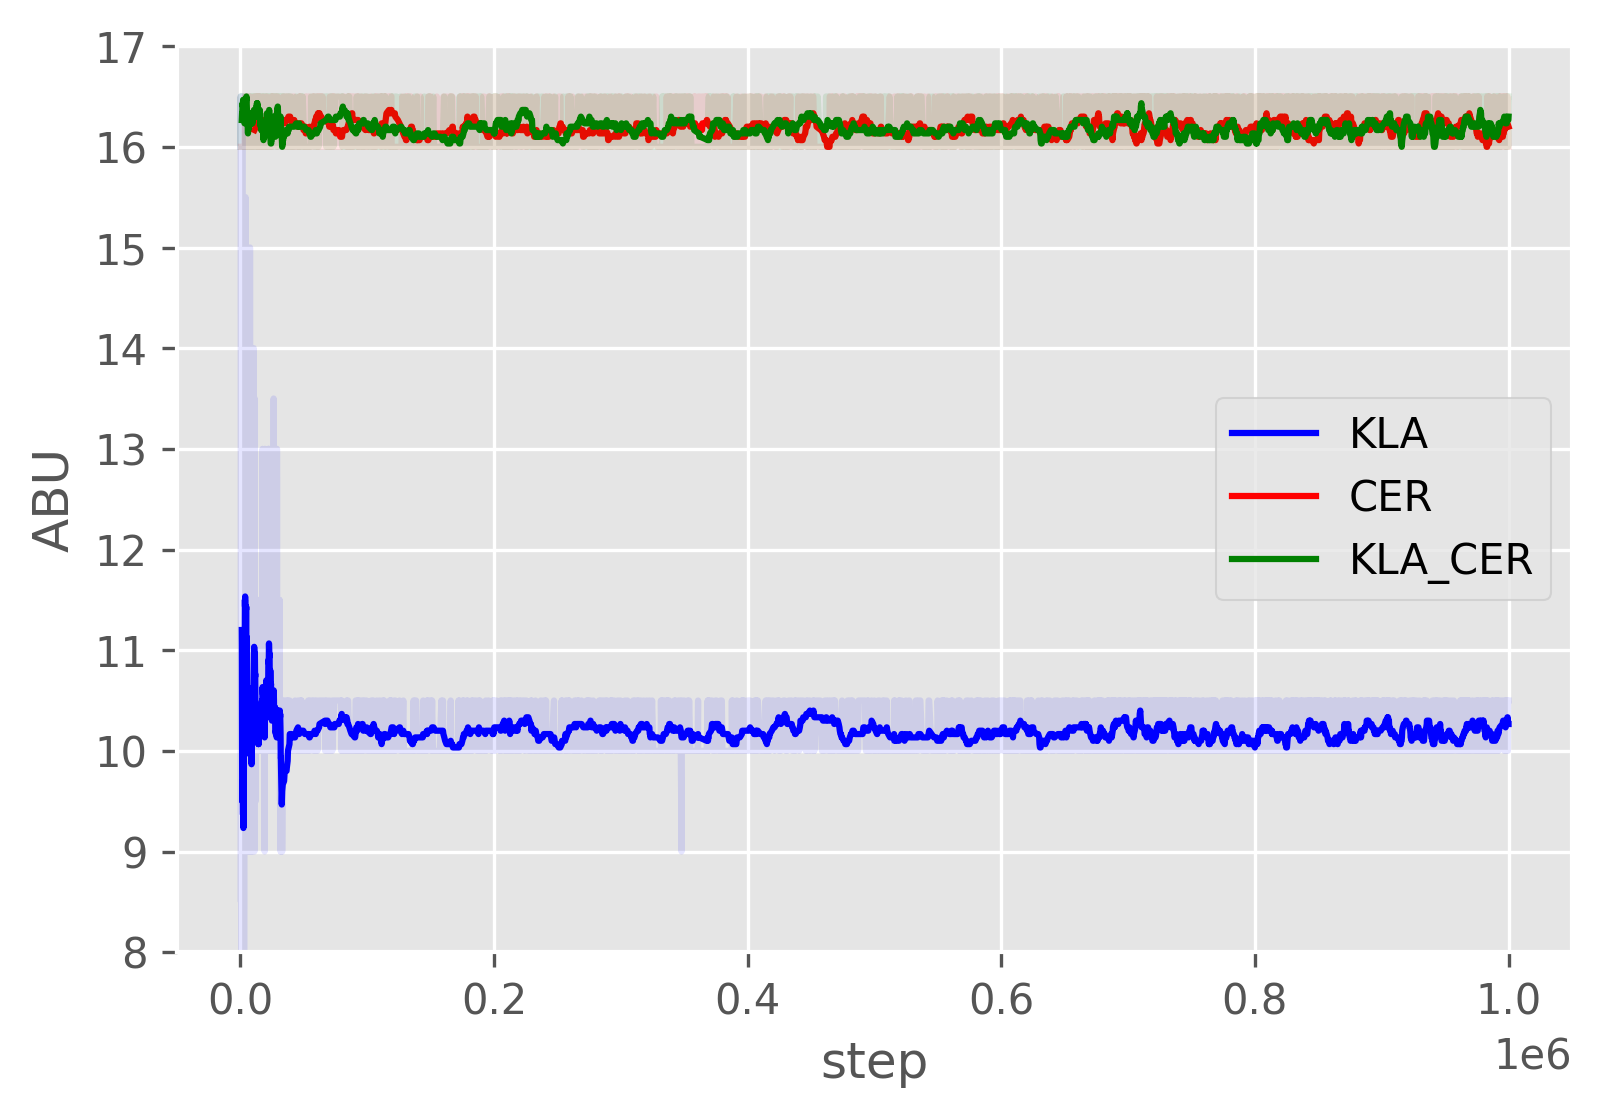

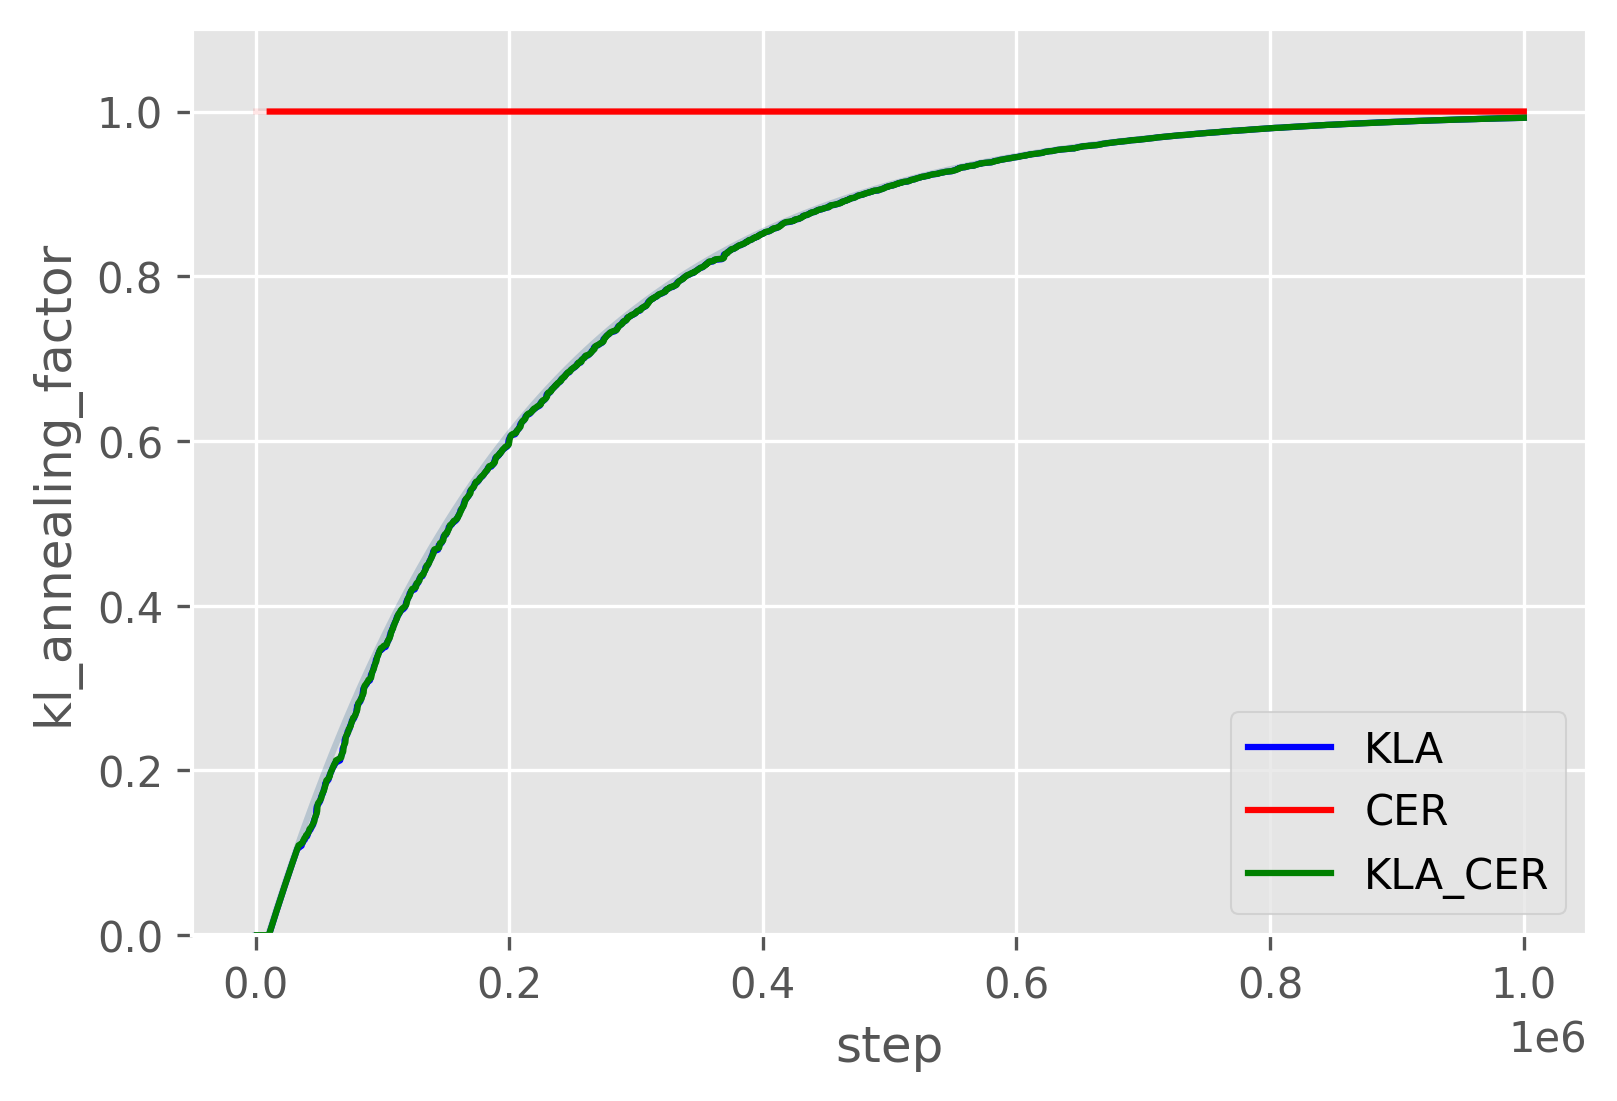

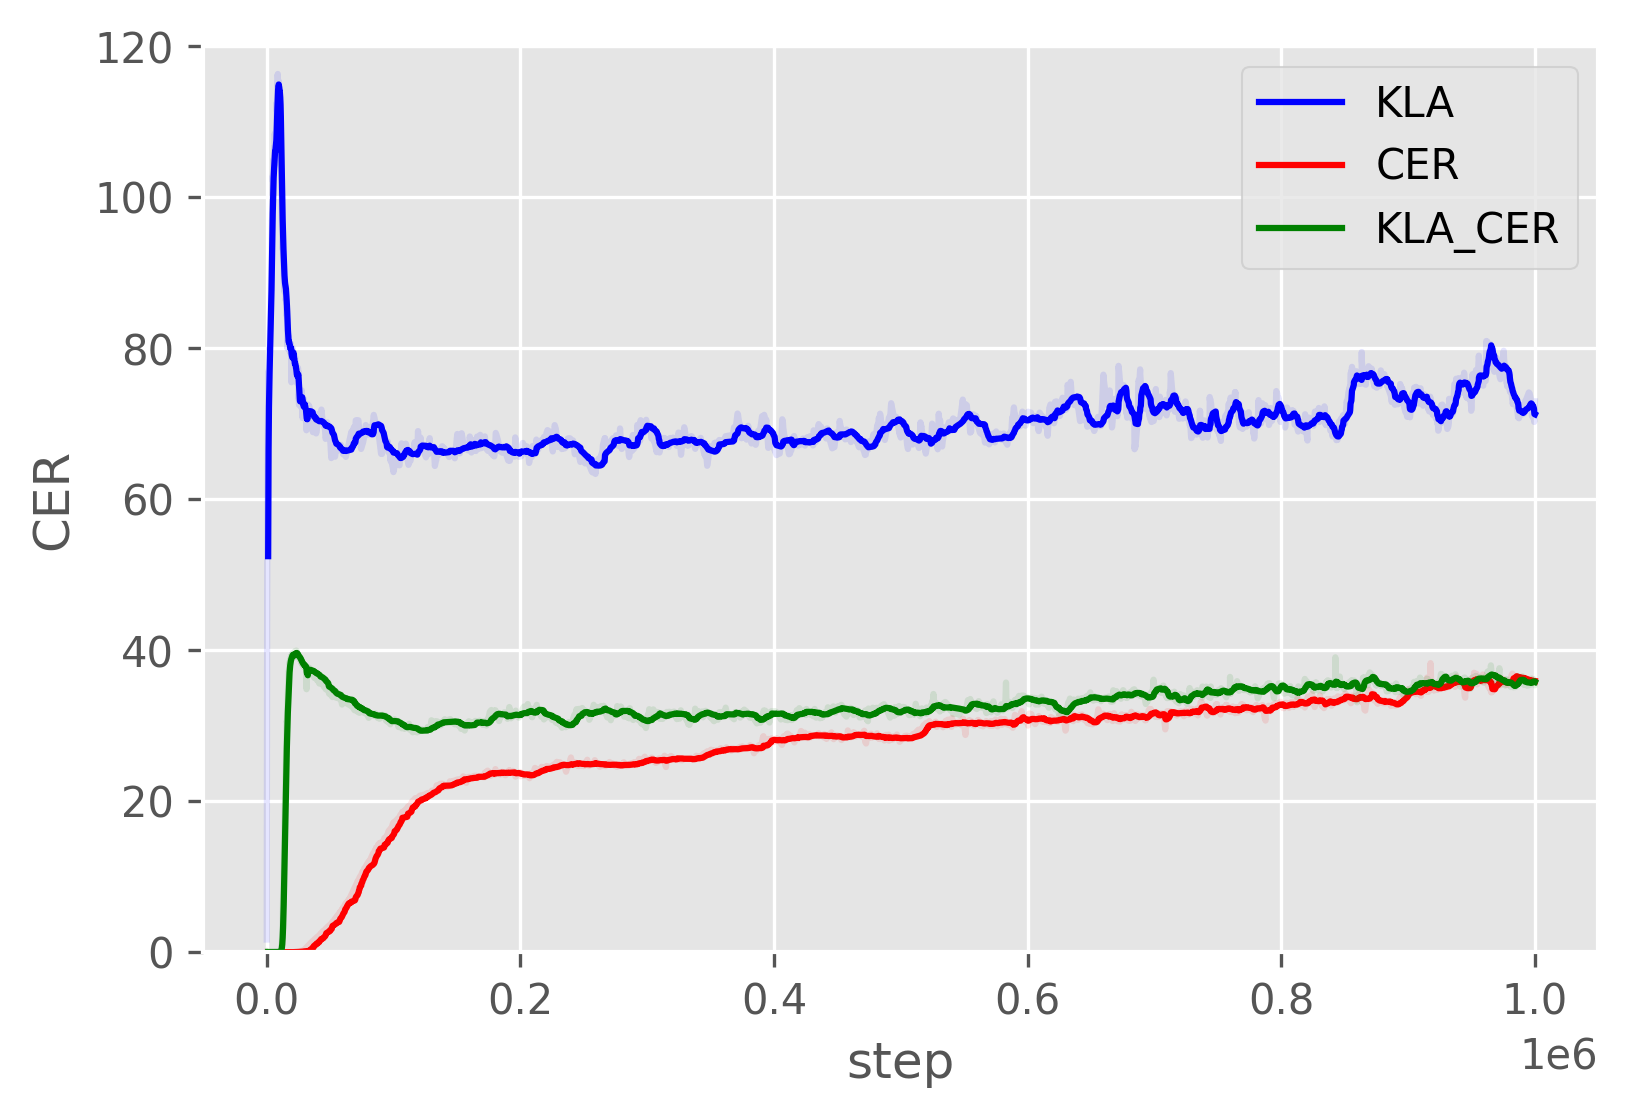

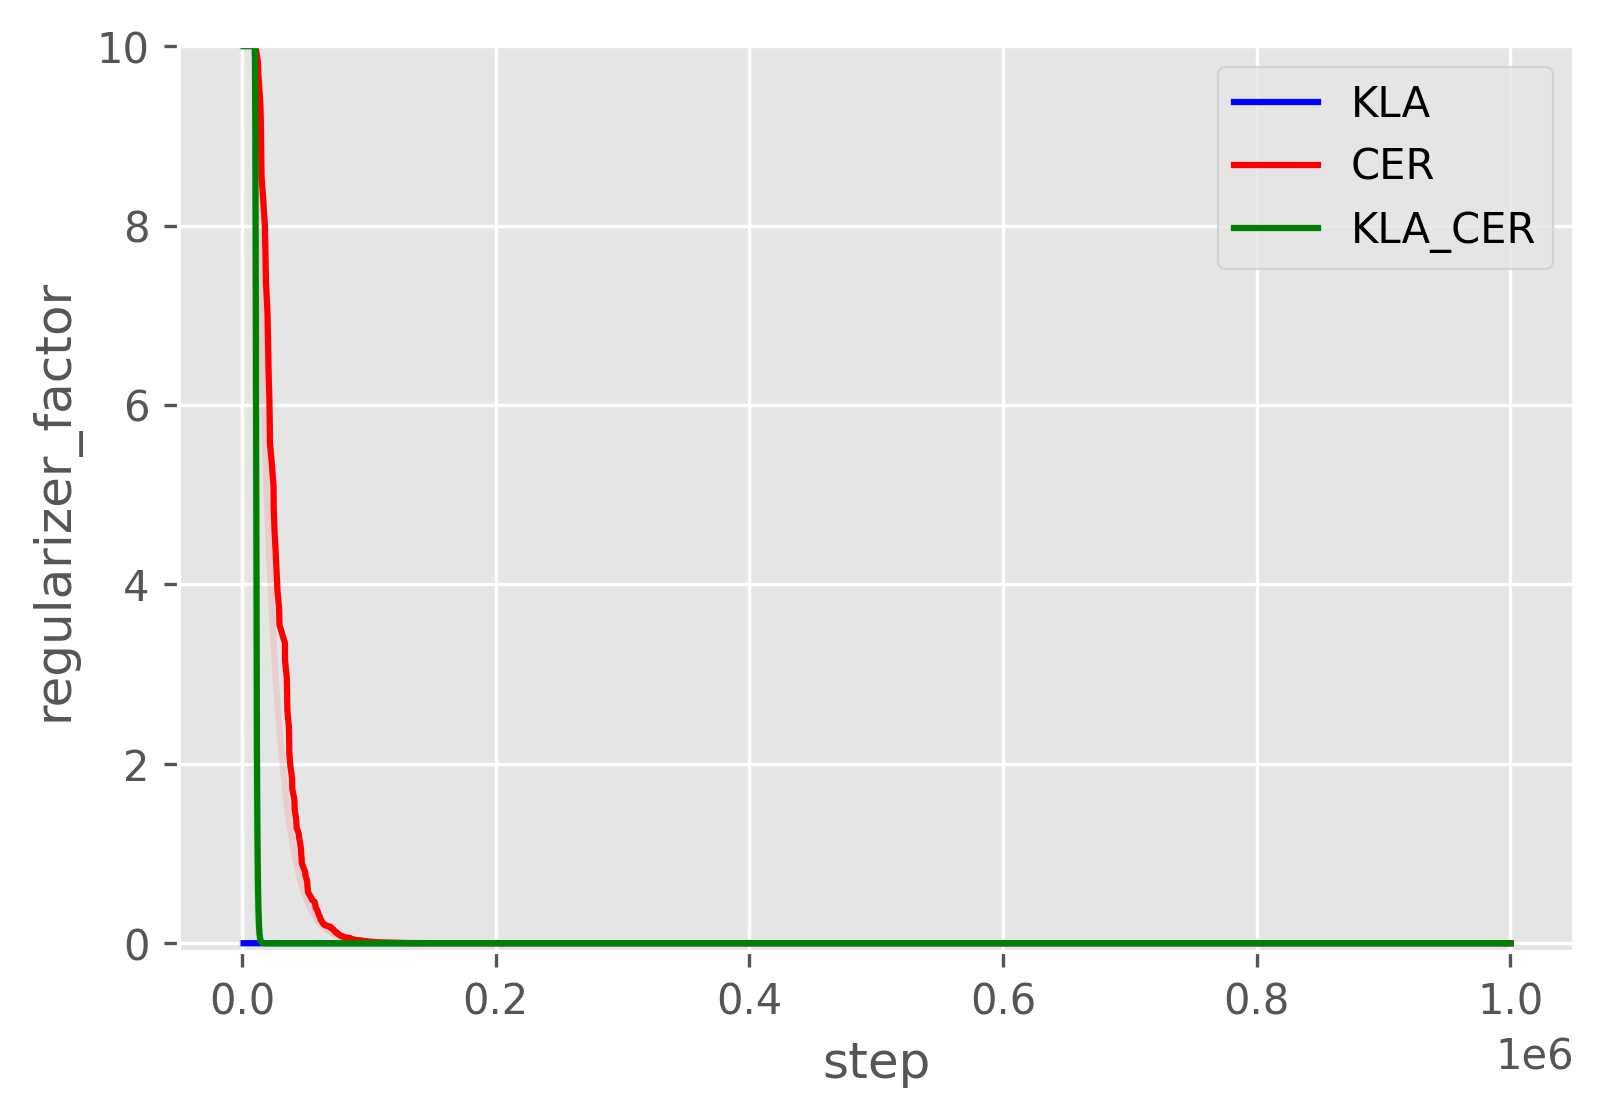

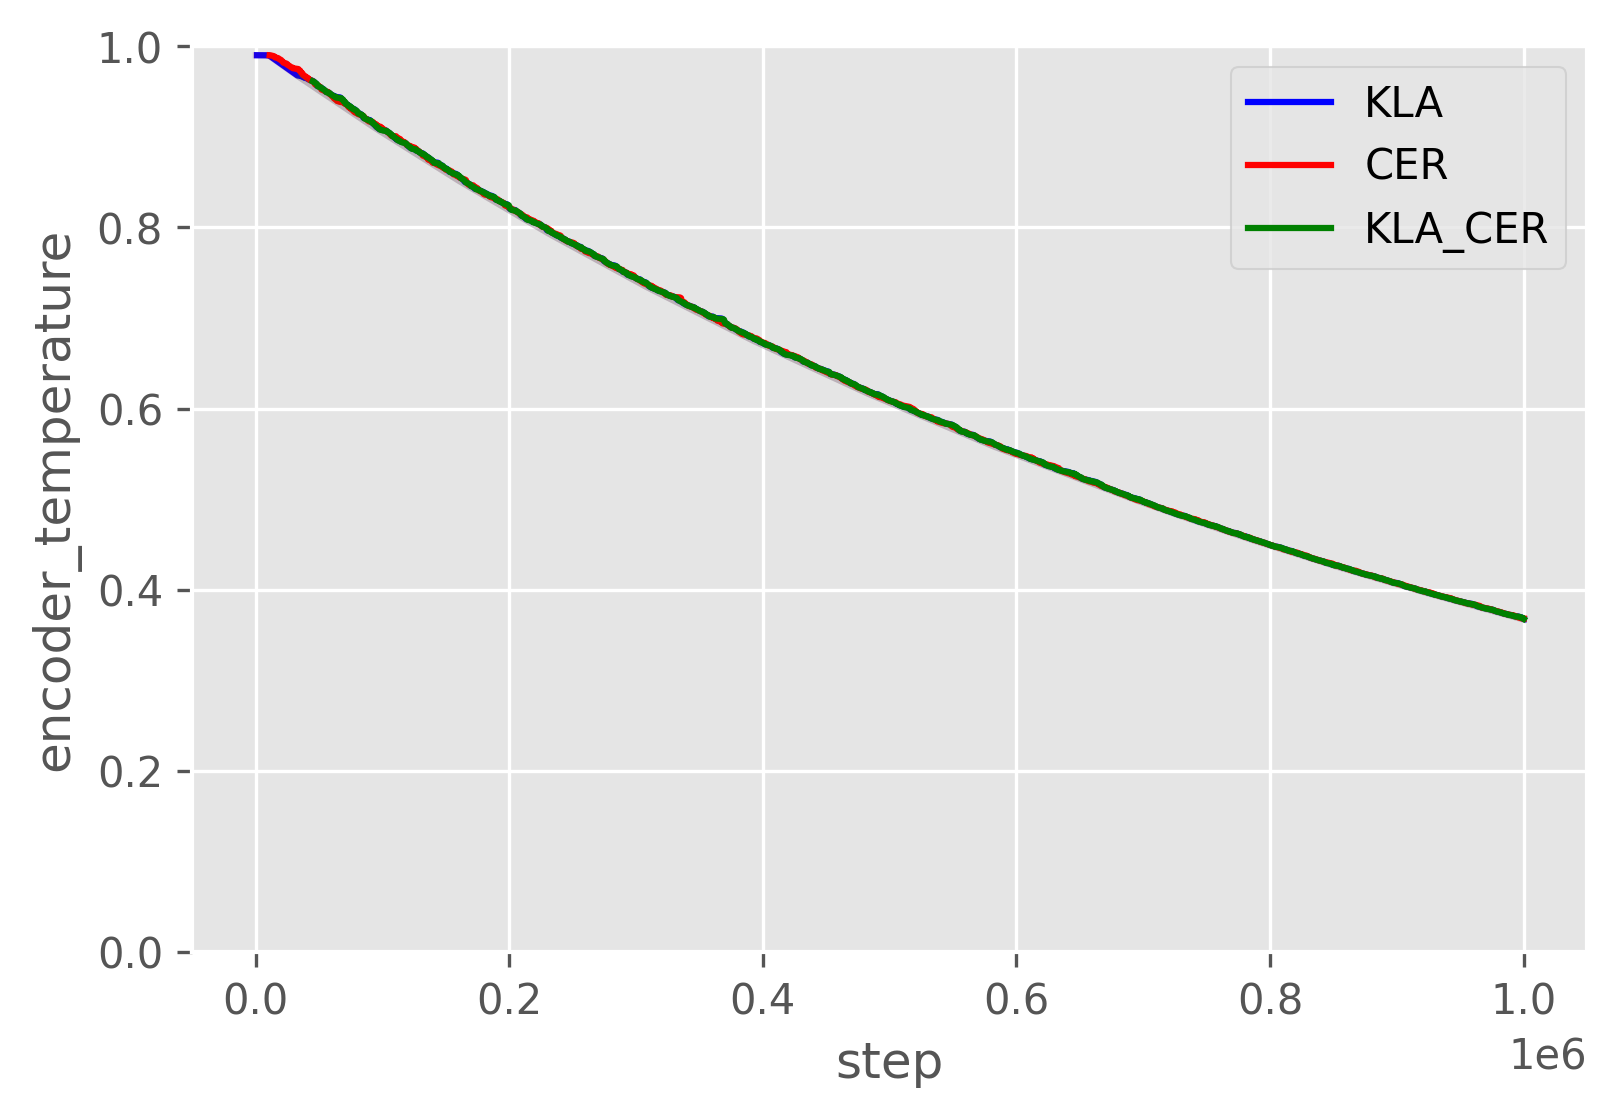

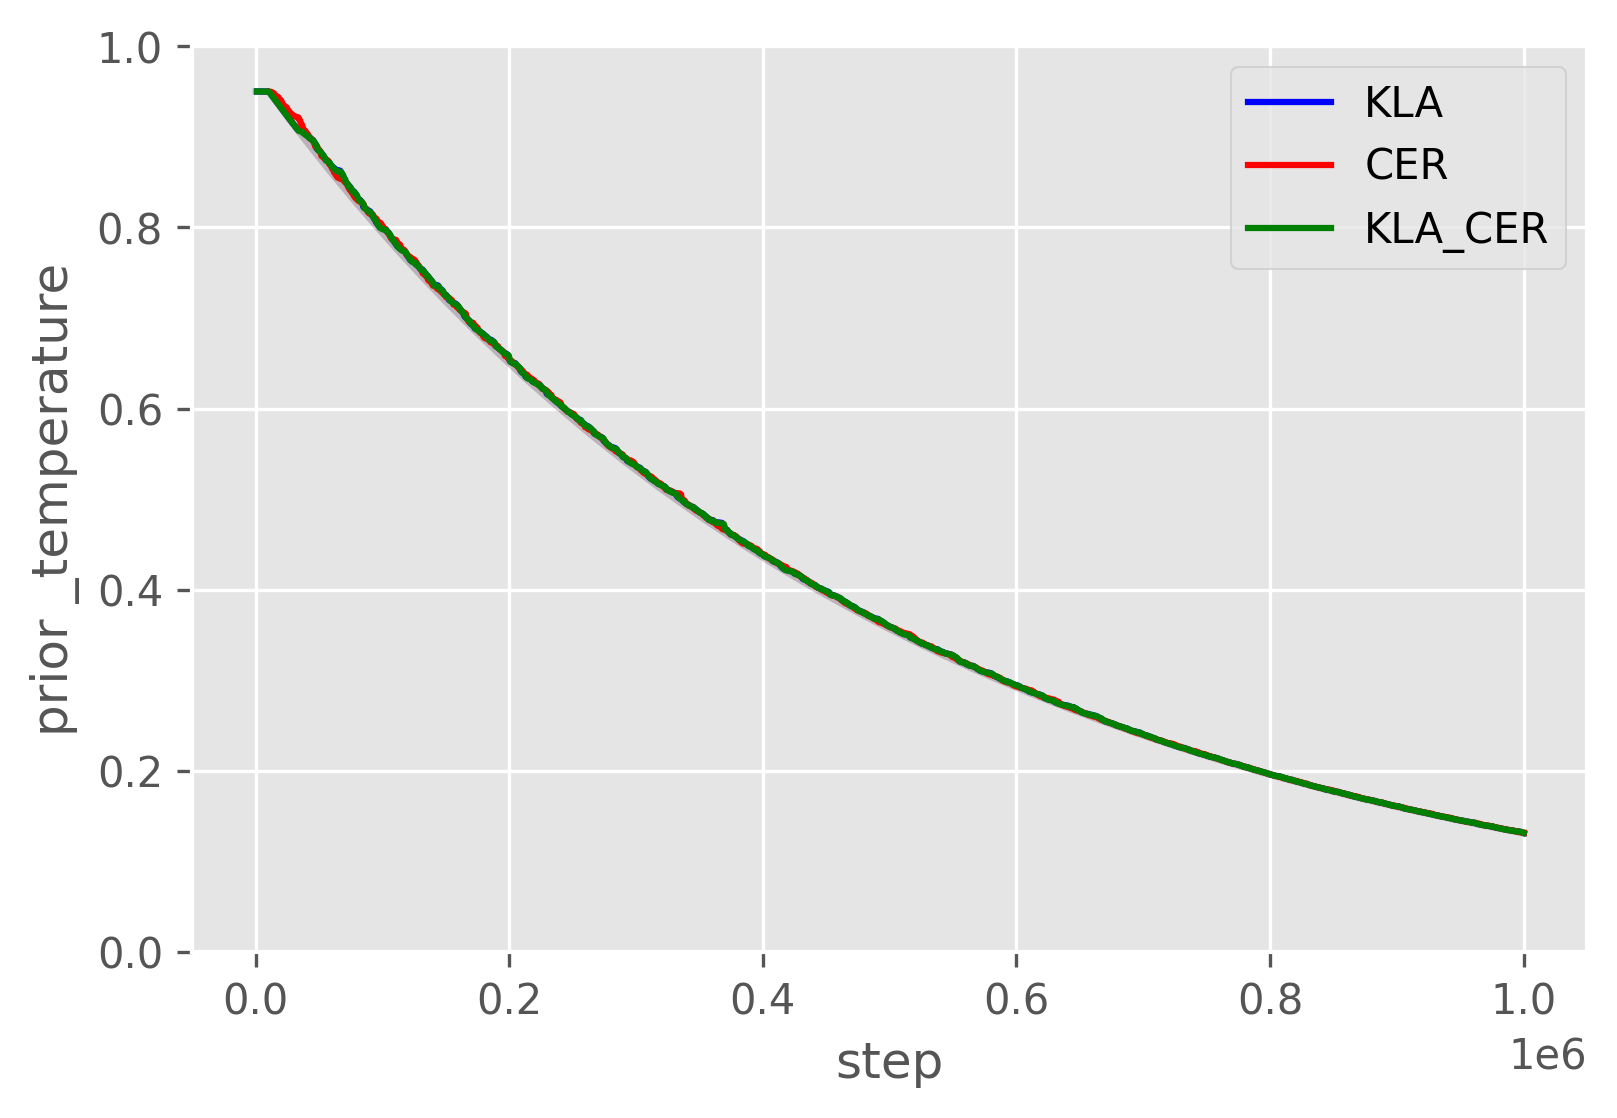

In [34]:
directory_list = [
    "ELBO",
    "eval_ELBO",
    "distortion",
    "rate",
    "ABU",
    "kl_annealing_factor",
    "CER",
    "regularizer_factor",
    "encoder_temperature",
    "prior _temperature"
]

scale = {
    "ELBO": [0, 40],
    "eval_ELBO": [0, 40],
    "distortion": [-50, 10],
    "rate": [0, 20],
    "ABU": [8, 17],
    "kl_annealing_factor": [0, 1.1],
    "CER": [0, 120],
    "regularizer_factor": [-0.1, 10],
    "encoder_temperature": [0, 1],
    "prior _temperature": [0, 1]
}

colors = {
    'KLA': 'blue',
    'CER': 'red',
    'KLA_CER': 'green'
}

plt.style.use('ggplot')

for metric in directory_list:
    plt.figure(dpi=300)
    plt.xlabel("step")
    plt.ylabel(metric)
    plt.ylim(scale[metric][0], scale[metric][1])
    for model in ('KLA', 'CER', 'KLA_CER'):
        _, x, y = np.loadtxt('{}/{}.csv'.format(metric, model), delimiter=',', unpack=True, skiprows=1)
        y = pd.DataFrame(y)
        plt.plot(x, y, colors[model], alpha=0.1)
        plt.plot(x, y.rolling(15).mean(), colors[model], label=model)
        plt.legend()
    plt.show()